## Exploring Star Wars Movie Data 

We are looking a survey based on the Star Wars series of movies

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
#read in the data
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [11]:
print("the column names available:")
star_wars.columns

the column names available:


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [12]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Remove any rows where RespondentID is NaN. 

In [13]:
print("Total rows: " + str(star_wars.shape[0]))
print("Rows count with a Respondent ID: " + str(star_wars['RespondentID'].notnull().sum()))


Total rows: 1187
Rows count with a Respondent ID: 1186


We remove one row without a valid Respondent ID

In [14]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
print("Total rows after removing invalid RespondentID: " + str(star_wars.shape[0]))

Total rows after removing invalid RespondentID: 1186


Check the types of values : Have you seen any of the 6 films in the Star Wars franchise?' column

In [15]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

#data['relative_humidity']= data['relative_humidity'].apply(lambda x: humidity_median if x ==0 else x)



Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

Check the types of values : Do you consider yourself to be a fan of the Star Wars film franchise?' column

In [16]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Convert the columns Yes/No values to Booleans

In [17]:
col_bool = ['Have you seen any of the 6 films in the Star Wars franchise?','Do you consider yourself to be a fan of the Star Wars film franchise?']

for col in col_bool:
    star_wars[col] = star_wars[col].apply(lambda x: True if x=="Yes" else False)
    star_wars[col].value_counts()


True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

False    634
True     552
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

These columns contain the movie name if the respondent has seen the movie:
    
Which of the following Star Wars films have you seen? Please select all that apply.	(Star Wars: Episode I The Phantom Menace)

Unnamed: 4	(Star Wars: Episode II Attack of the Clones)

Unnamed: 5	(Star Wars: Episode III Revenge of the Sith)

Unnamed: 6	(Star Wars: Episode IV A New Hope)

Unnamed: 7	(Star Wars: Episode V The Empire Strikes Back)

Unnamed: 8  (Star Wars: Episode VI Return of the Jedi)


In [18]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [19]:
col_movies =star_wars.columns[3:9]
col_movies
#Check the values before doing the transformation
for col in col_movies:
    star_wars[col].value_counts()

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

Star Wars: Episode I  The Phantom Menace    673
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64

Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64

Star Wars: Episode IV  A New Hope    607
Name: Unnamed: 6, dtype: int64

Star Wars: Episode V The Empire Strikes Back    758
Name: Unnamed: 7, dtype: int64

Star Wars: Episode VI Return of the Jedi    738
Name: Unnamed: 8, dtype: int64

We use the lambda function to convert these into true false values and rename the columns accordingly

In [20]:
#eg of renaming

# df_list=[df1, df2, df3]
# for i, df in enumerate(df_list, 1):
#     df.columns = [col_name+'_df{}'.format(i) for col_name in df.columns]



movie_num = 1
for col in col_movies :
   star_wars[col] = star_wars[col].apply(lambda x: True if pd.notnull(x) else False)
   #star_wars[col].value_counts()
   col_name_new = "seen_ep" + str(movie_num)
   star_wars = star_wars.rename(columns= {col: col_name_new})
   #print(star_wars[col].columns)
   star_wars[col_name_new].value_counts()
   movie_num+=1



True     673
False    513
Name: seen_ep1, dtype: int64

False    615
True     571
Name: seen_ep2, dtype: int64

False    636
True     550
Name: seen_ep3, dtype: int64

True     607
False    579
Name: seen_ep4, dtype: int64

True     758
False    428
Name: seen_ep5, dtype: int64

True     738
False    448
Name: seen_ep6, dtype: int64

In [21]:
#col_new_name = ["seen_ep1"

In [22]:
#star_wars.rename(columns={col_movies[0]: "seen_ep1" ,  col_movies[1]: "seen_ep2" , col_movies[2]: "seen_ep3"})

In [23]:
star_wars.head()
star_wars.columns

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,False,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',

In [24]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1186 non-null bool
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            1186 non-null bool
seen_ep1                                                                                                                                         1186 non-null bool
seen_ep2                                                                                                                                         1186 non-null bool
seen_ep3                                                              

Convert the objects to numeric values and rename the columns


Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    835 non-null object

Unnamed: 10                                                                                                                                      836 non-null object

Unnamed: 11                                                                                                                                      835 non-null object

Unnamed: 12                                                                                                                                      836 non-null object

Unnamed: 13                                                                                                                                      836 non-null object

Unnamed: 14                                                                                                                                      836 non-null object


In [25]:
col_num = star_wars.columns[9:15]
col_num

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [26]:
movie_num = 1
for col in col_num :
   star_wars[col] = star_wars[col].astype(float)
   #star_wars[col].value_counts()
   col_name_new = "ranking_ep" + str(movie_num)
   star_wars = star_wars.rename(columns= {col: col_name_new})
   movie_num+=1



In [27]:
print("check the naming is done correctly:" )
star_wars.columns

check the naming is done correctly:


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6',
       'ranking_ep1', 'ranking_ep2', 'ranking_ep3', 'ranking_ep4',
       'ranking_ep5', 'ranking_ep6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
    

We now compute the average ranking for the movies

In [28]:
col_ranking = star_wars.columns[star_wars.columns.str.contains('ranking', na=False)]
print(col_ranking)

Index(['ranking_ep1', 'ranking_ep2', 'ranking_ep3', 'ranking_ep4',
       'ranking_ep5', 'ranking_ep6'],
      dtype='object')


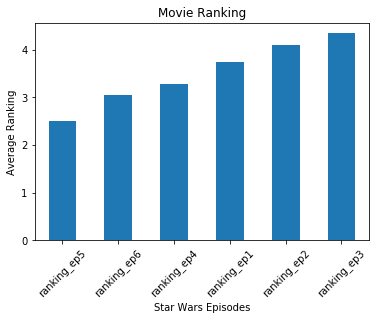

In [40]:
star_wars[col_ranking].mean().sort_values().plot.bar()
plt.title("Movie Ranking");
plt.xlabel("Star Wars Episodes");
plt.ylabel("Average Ranking");
plt.xticks(rotation=45);

We are looking for the lowest rank here.

The Best Ranking is for Ep 5: Empire Strikes Back

How many people have seen each movie? 

In [30]:
col_seen = star_wars.columns[star_wars.columns.str.contains('seen_', na=False)]
print(col_seen)

Index(['seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6'], dtype='object')


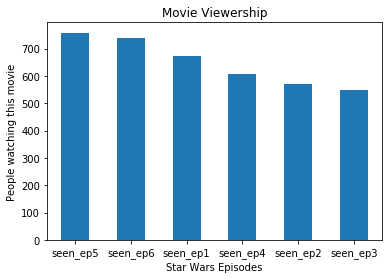

In [31]:
star_wars[col_seen].sum().sort_values(ascending=False).plot.bar()
plt.title("Movie Viewership");
plt.xlabel("Star Wars Episodes");
plt.ylabel("People watching this movie");
plt.xticks(rotation=0);

It's no surprise that the movie with the Best Ranking also has the highest number of viewers

Group the viewers into Star Wars Fans vs Trekies (Star Trek Fans)

In [45]:
star_wars.groupby('Do you consider yourself to be a fan of the Star Wars film franchise?')[col_seen].agg(sum)
star_wars.groupby('Do you consider yourself to be a fan of the Star Wars film franchise?')[col_ranking].agg(np.mean)

,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6
Do you consider yourself to be a fan of the Star Wars film franchise?,,,,,,
False,173.0,108.0,100.0,124.0,220.0,201.0
True,500.0,463.0,450.0,483.0,538.0,537.0


,ranking_ep1,ranking_ep2,ranking_ep3,ranking_ep4,ranking_ep5,ranking_ep6
Do you consider yourself to be a fan of the Star Wars film franchise?,,,,,,
False,2.936396,3.591549,4.193662,3.933099,2.862676,3.471831
True,4.141304,4.342391,4.417423,2.932971,2.333333,2.829710


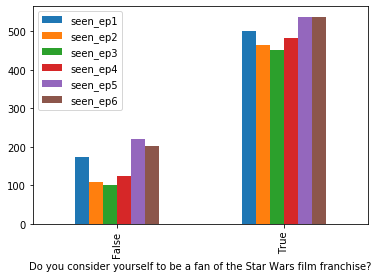

In [33]:
star_wars.groupby('Do you consider yourself to be a fan of the Star Wars film franchise?')[col_seen].agg(sum).plot.bar()

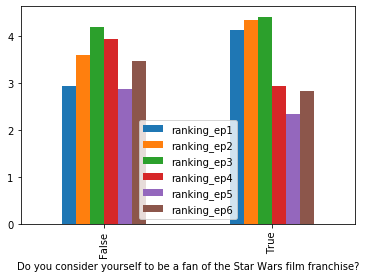

In [58]:
star_wars.groupby('Do you consider yourself to be a fan of the Star Wars film franchise?')[col_ranking].agg(np.mean).plot.bar()
plt.legend(loc='bottom')

We see that most Star Wars fans give a better ranking to episode 4,5 and 6 - the first trilogy that was released.

In [34]:
star_wars.groupby('Do you consider yourself to be a fan of the Star Trek franchise?')[col_seen].agg(sum)

,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6
Do you consider yourself to be a fan of the Star Trek franchise?,,,,,,
No,301.0,228.0,221.0,258.0,353.0,334.0
Yes,364.0,336.0,322.0,342.0,397.0,396.0


Comparing the fan base, naturally the Star Wars Fans have a higher viewership

The Star Trek fans don't show any particular preference

In [35]:
star_wars.groupby('Gender')[col_seen].agg(sum)

,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6
Gender,,,,,,
Female,298.0,237.0,222.0,255.0,353.0,338.0
Male,361.0,323.0,317.0,342.0,392.0,387.0


Are there more male or female fans of the franchise?

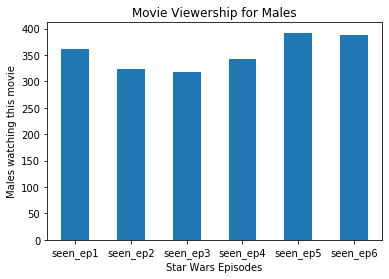

In [36]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]


males[col_seen].agg(sum).plot.bar()
plt.title("Movie Viewership for Males");
plt.xlabel("Star Wars Episodes");
plt.ylabel("Males watching this movie");
plt.xticks(rotation=0);




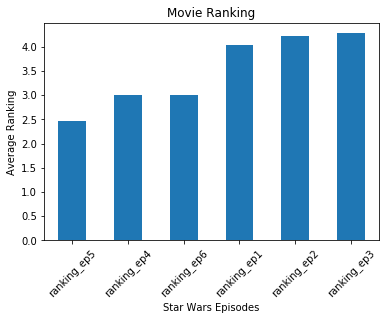

In [37]:
males[col_ranking].mean().sort_values().plot.bar()
plt.title("Movie Ranking");
plt.xlabel("Star Wars Episodes");
plt.ylabel("Average Ranking");
plt.xticks(rotation=45);



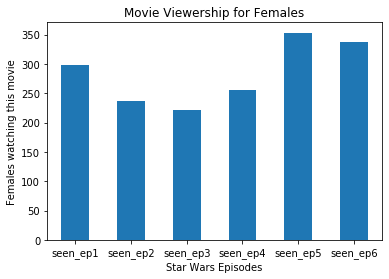

In [38]:
females[col_seen].agg(sum).plot.bar()
plt.title("Movie Viewership for Females");
plt.xlabel("Star Wars Episodes");
plt.ylabel("Females watching this movie");
plt.xticks(rotation=0);




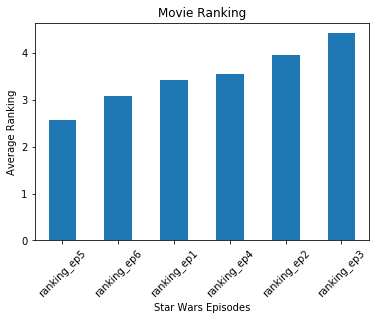

In [39]:
females[col_ranking].mean().sort_values().plot.bar()
plt.title("Movie Ranking");
plt.xlabel("Star Wars Episodes");
plt.ylabel("Average Ranking");
plt.xticks(rotation=45);
#females.groupby('Do you consider yourself to be a fan of the Star Wars film franchise?')[col_seen].agg(sum)